[[ 0.  0.  0.  3. 12. 12.  2.  0.]
 [ 0.  0.  7. 15. 16. 16.  0.  0.]
 [ 0.  4. 15.  9. 14. 16.  3.  0.]
 [ 0.  2.  0.  0. 14. 16.  0.  0.]
 [ 0.  0.  0.  0. 14. 16.  0.  0.]
 [ 0.  0.  0.  0. 15. 13.  0.  0.]
 [ 0.  0.  0.  0. 16. 14.  1.  0.]
 [ 0.  0.  0.  3. 16. 13.  2.  0.]]


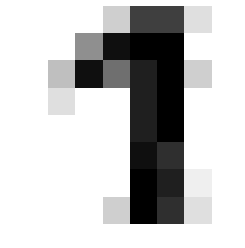

1300

In [31]:
from sklearn.datasets import load_digits
mnist=load_digits()
mnist
X,y=mnist["data"],mnist["target"]
X.shape
y.shape
import matplotlib
import matplotlib.pyplot as plt
digit=X[1500]
digit=digit.reshape(8,8)
print(digit)
plt.imshow(digit,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show() 
y[1500]
import numpy as np
shuffle_index=np.random.permutation(1300)
X_train,X_test,y_train,y_test=X[:1300],X[1300:],y[:1300],y[1300:]
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]
y_5=(y_train==5)
y_test5=(y_test==5)
len(y_5)

In [32]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
sgd_clf.predict(X_test)

array([False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

# IMPLEMENTING CROSS-VALIDATION 

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=4,random_state=0)
print(len(X_test))
for train_index,test_index in skfolds.split(X_train,y_5):
    clone_clf=clone(sgd_clf)
    print(len(train_index))
    print(len(test_index))
    X_train_folds = X_train[train_index]
    y_train_folds = (y_5[train_index])
    X_test_folds = (X_train[test_index])
    y_test_folds = (y_5[test_index])
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

497
974
326
0.9877300613496932
975
325
0.9907692307692307
975
325
0.9353846153846154
976
324
0.9814814814814815


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_5,cv=4,scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.98773006, 0.99076923, 0.93538462, 0.98148148])

# Try using Base Estimator

In [43]:
from sklearn.base import BaseEstimator
class Nver5classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
nver=Nver5classifier()
cross_val_score(nver,X_train,y_5,cv=4,scoring="accuracy")

array([0.92307692, 0.89538462, 0.90769231, 0.87076923])


# Confusion Matrix

In [48]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf,X_train,y_5,cv=2)
print(y_train_predict)

[False False False ... False False False]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_5,y_train_predict)

array([[1158,   11],
       [   5,  126]], dtype=int64)

In [54]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_5,y_train_predict))
print(recall_score(y_5,y_train_predict))
print(f1_score(y_5,y_train_predict))

0.9197080291970803
0.9618320610687023
0.9402985074626866


In [62]:
y_scores = cross_val_predict(sgd_clf,X_train,y_5,cv=3,method="decision_function")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [79]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_5,y_scores)
print(len(precisions))
print(len(recalls))


338
338


# Precision and recall versus the decision threshold

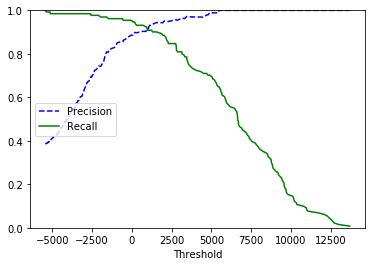

In [80]:
def plot(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
plot(precisions,recalls,thresholds)
plt.show()


# ROC CURVES

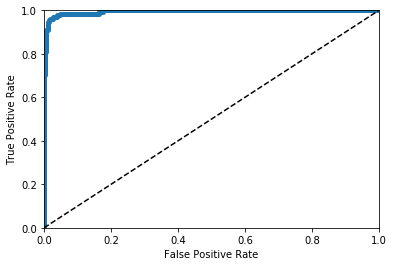

In [85]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_5,y_scores)
def plot_roc(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=5,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc(fpr,tpr)
plt.show()

In [87]:
roc_auc_score(y_5,y_scores)

0.995043718451864